In [42]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def list_files_in_directory(directory_path):
    try:
        # 디렉터리 내 모든 파일과 디렉터리 목록을 가져옴
        all_items = os.listdir(directory_path)
        
        # 파일만 추출
        files = [item for item in all_items if os.path.isfile(os.path.join(directory_path, item))]
        
        return files
    except Exception as e:
        print(f"An error occurred: {e}")
        return []

In [5]:
def save_list_to_excel(data, excel_path):
    try:
        # 데이터 프레임 생성
        df = pd.DataFrame(data, columns=['File Names'])
        
        # 엑셀 파일로 저장
        df.to_excel(excel_path, index=False)
        print(f"File names successfully saved to {excel_path}")
    except Exception as e:
        print(f"An error occurred while saving to Excel: {e}")

In [15]:
# 파일 이름을 변환하는 함수
def convert_filename(filename):
    # 정규 표현식을 사용하여 한자리 숫자를 두자리 숫자로 변환
    def replace(match):
        return f"{int(match.group()):02}"
    
    # 파일 이름의 숫자 부분을 변환
    new_filename = re.sub(r'(?<!\d)(\d)(?!\d)', replace, filename)
    return new_filename


In [30]:
# 사용 예시
directory_path = 'C:\\lee\\work\\SAI\\assets\\id_0\\data'
save_path = 'C:\\lee\\work\\SAI\\assets\\list.xlsx' # 여기에 디렉터리 경로를 입력하세요.
files = list_files_in_directory(directory_path)
label_path = 'C:\\lee\\work\\SAI\\assets\\id_0\\label'

In [35]:
# 엑셀에 저장할 데이터를 담을 딕셔너리 초기화
data = {
    'filename': [],
    'glasses': [],
    'headwear': []
}

# JSON 파일 읽기
for file in os.listdir(label_path):
    json_file = f'{label_path}\\{file}'
    image_filename = json_file.replace('.info.json','.rgb.png')
    with open(json_file, 'r', encoding='utf-8') as f:
        json_data = json.load(f)

    # glasses와 headwear 정보 추출하여 데이터에 추가
    glasses_info = json_data['accessories']['glasses']['style']
    headwear_info = json_data['accessories']['headwear']['style']

    # filename 추가
    data['filename'].append(os.path.basename(image_filename))

    # glasses 정보 추가
    if glasses_info != 'none':
        data['glasses'].append('O')
    else:
        data['glasses'].append('X')

    # headwear 정보 추가
    if headwear_info != 'none':
        data['headwear'].append('O')
    else:
        data['headwear'].append('X')

    # 데이터프레임 생성
    df = pd.DataFrame(data)


df.to_excel(save_path, index=False)

In [39]:
# 기존 Excel 파일 경로 설정
excel_file = r'C:\lee\work\SAI\assets\list.xlsx'

# JSON 파일들이 있는 디렉토리 설정
json_directory = r'C:\lee\work\SAI\assets\id_0\label'

In [41]:
# 기존 Excel 파일 불러오기
df = pd.read_excel(excel_file)

# action 열 추가를 위한 리스트 초기화
actions = []

# JSON 파일들을 순회하며 gesture name 추출
for filename in os.listdir(json_directory):
    if filename.endswith('.json'):
        json_path = os.path.join(json_directory, filename)
        with open(json_path, 'r', encoding='utf-8') as f:
            json_data = json.load(f)
            gesture_name = json_data['gesture']['name']
            actions.append(gesture_name)

# action 열 추가
df['action'] = actions

# 결과를 새로운 Excel 파일로 저장
output_excel = r'C:\lee\work\SAI\assets\list.xlsx'
df.to_excel(output_excel, index=False)

print(f'Updated Excel file saved to {output_excel}')

Updated Excel file saved to C:\lee\work\SAI\assets\list.xlsx


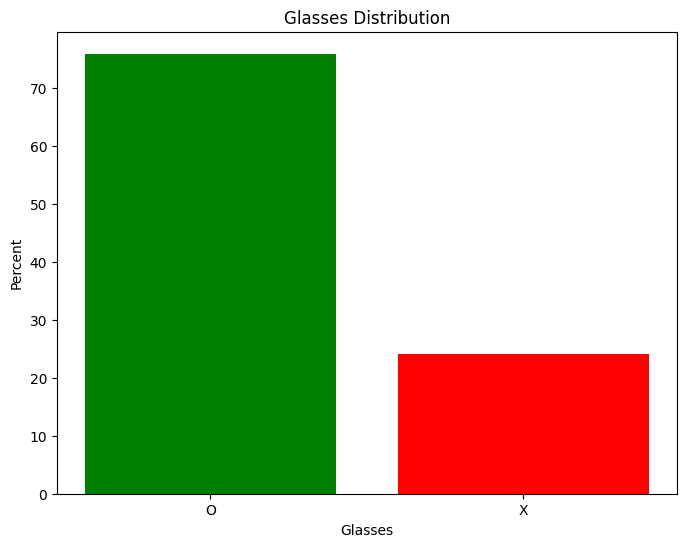

In [45]:
# Data for glasses category
glasses_data = {
    "glasses": ["O", "X"],
    "glasses_value": [1515, 482],
    "glasses_percent": [75.9, 24.1]
}

# Convert the data into a pandas DataFrame
glasses_df = pd.DataFrame(glasses_data)

# Plotting the data
fig, ax = plt.subplots(figsize=(8, 6))

# Bar chart for glasses data
ax.bar(glasses_df["glasses"], glasses_df["glasses_percent"], color=["green", "red"])
ax.set_title("Glasses Distribution")
ax.set_xlabel("Glasses")
ax.set_ylabel("Percent")

# Show the plot
plt.show()

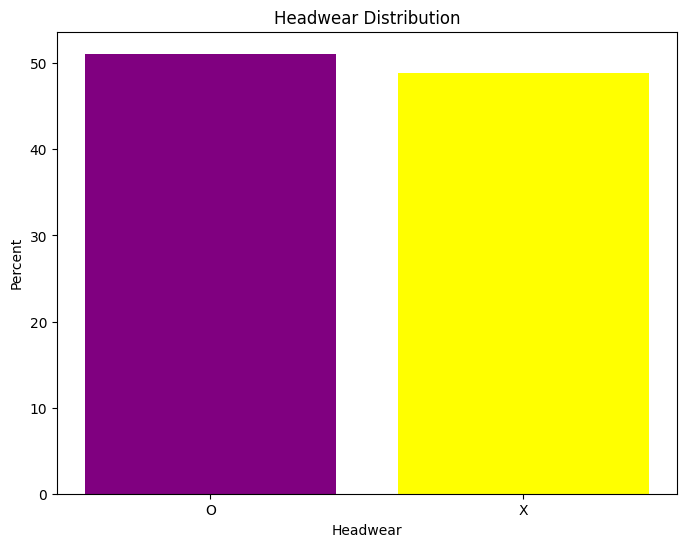

In [46]:
# Data for headwear category
headwear_data = {
    "headwear": ["O", "X"],
    "headwear_value": [1021, 976],
    "headwear_percent": [51.1, 48.9]
}

# Convert the data into a pandas DataFrame
headwear_df = pd.DataFrame(headwear_data)

# Plotting the data
fig, ax = plt.subplots(figsize=(8, 6))

# Bar chart for headwear data
ax.bar(headwear_df["headwear"], headwear_df["headwear_percent"], color=["purple", "yellow"])
ax.set_title("Headwear Distribution")
ax.set_xlabel("Headwear")
ax.set_ylabel("Percent")

# Show the plot
plt.show()